# Case Study - Assignment - Boom Bikes

## Steps Involved:
#### Step 1: Load and Understand Data
#### Step 2: Visualize data for analysis
#### Step 3: Data modelling - Split Data for Train and Test
#### Step 4: Train the model
#### Step 5: Residual Analysis
#### Step 6: Evaluation of prediction model using the test set

## Importing the libraries

In [1]:
import warnings
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load and Understand the data

In [3]:
# Supress warnings
warnings.filterwarnings('ignore')

#Load Data
data = pd.read_csv('day.csv')

#### Checking the data

In [6]:
data.shape

(730, 16)

In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Changing the dtype of dteday from Object to datetime
data.dteday = pd.to_datetime(data.dteday,format="%d-%m-%Y")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Observations:
1. There are no null variables.
2. `instant` is an index variable. Hence has high cardinality and also may not be useful as it does not directly impact the target variable `cnt`
3. All the variable data types, excpet dteday, are numerical in values. Hence are in required format
4. `dteday` is date whose derived varibles are already captured in variables `yr`, `mnth`, `weekday`, `workingday`. This seems to be redundant. So its validity may need to be foundout
5. Chances of `atemp` being correlated to `temp`are high. This needs to be looked into as well
6. `workingday`, `weekday`  are categorical variables that are already converted to numerical values
7. `season`, `weathersit` are dummy variables which actually do not have any specific order. So these could be converted to categorical variables
8. Output variable to track as per the given problem statement: `cnt`. Hence `casual` and `registered` may be removed as `cnt`=`casual` + `registered` and are completely collinear

In [19]:
#Lets check the correlation between some of the base variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']
data[num_vars].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


## Step 2: Visualising Data for Analysis

### Visualizing numerical variables
#### Univariate Analysis

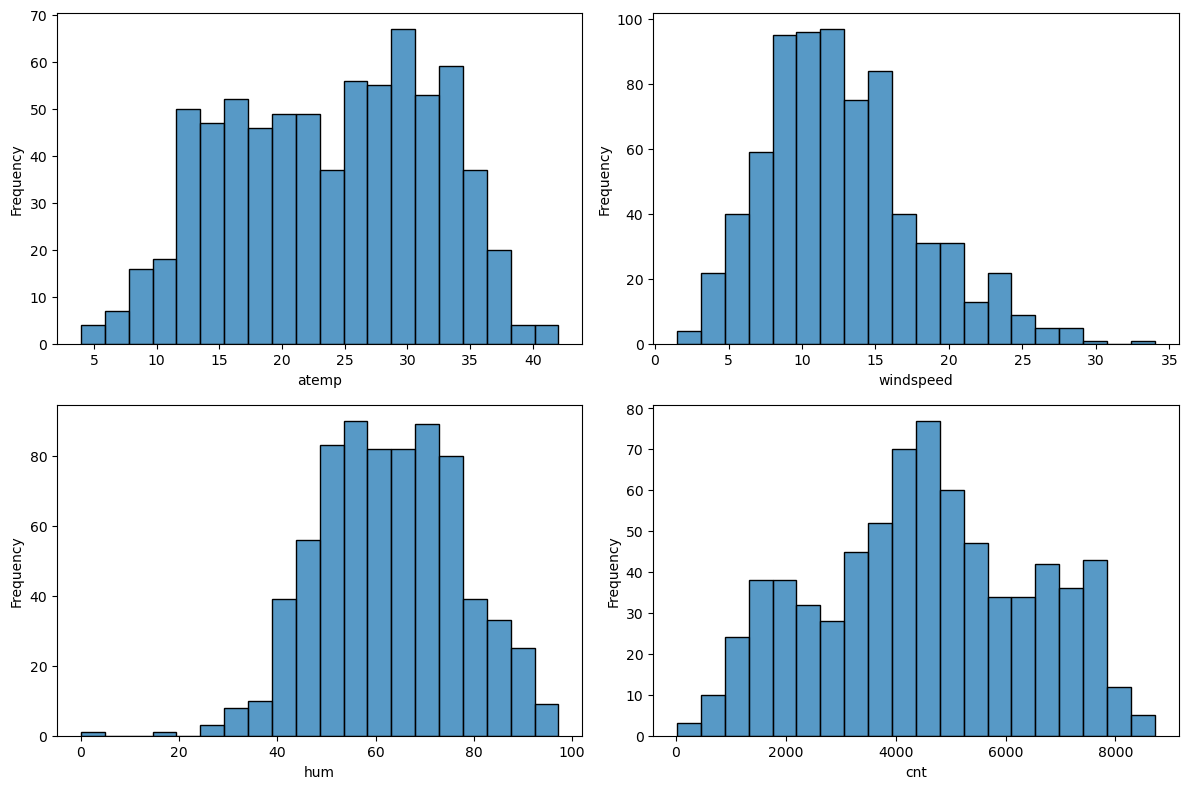

In [23]:
num_vars_of_interest = [ 'atemp', 'windspeed', 'hum', 'cnt']

plt.figure(figsize=(12,8))
for var in num_vars_of_interest:
    plt.subplot(2,2,num_vars_of_interest.index(var)+1)
    sns.histplot(data[var], bins=20)
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### Observation:
- `atemp`, and `cnt` seem to follow a reasonably normal distribution.
- `hum` and `windspeed` show some skewness.

#### Bivariate Analysis

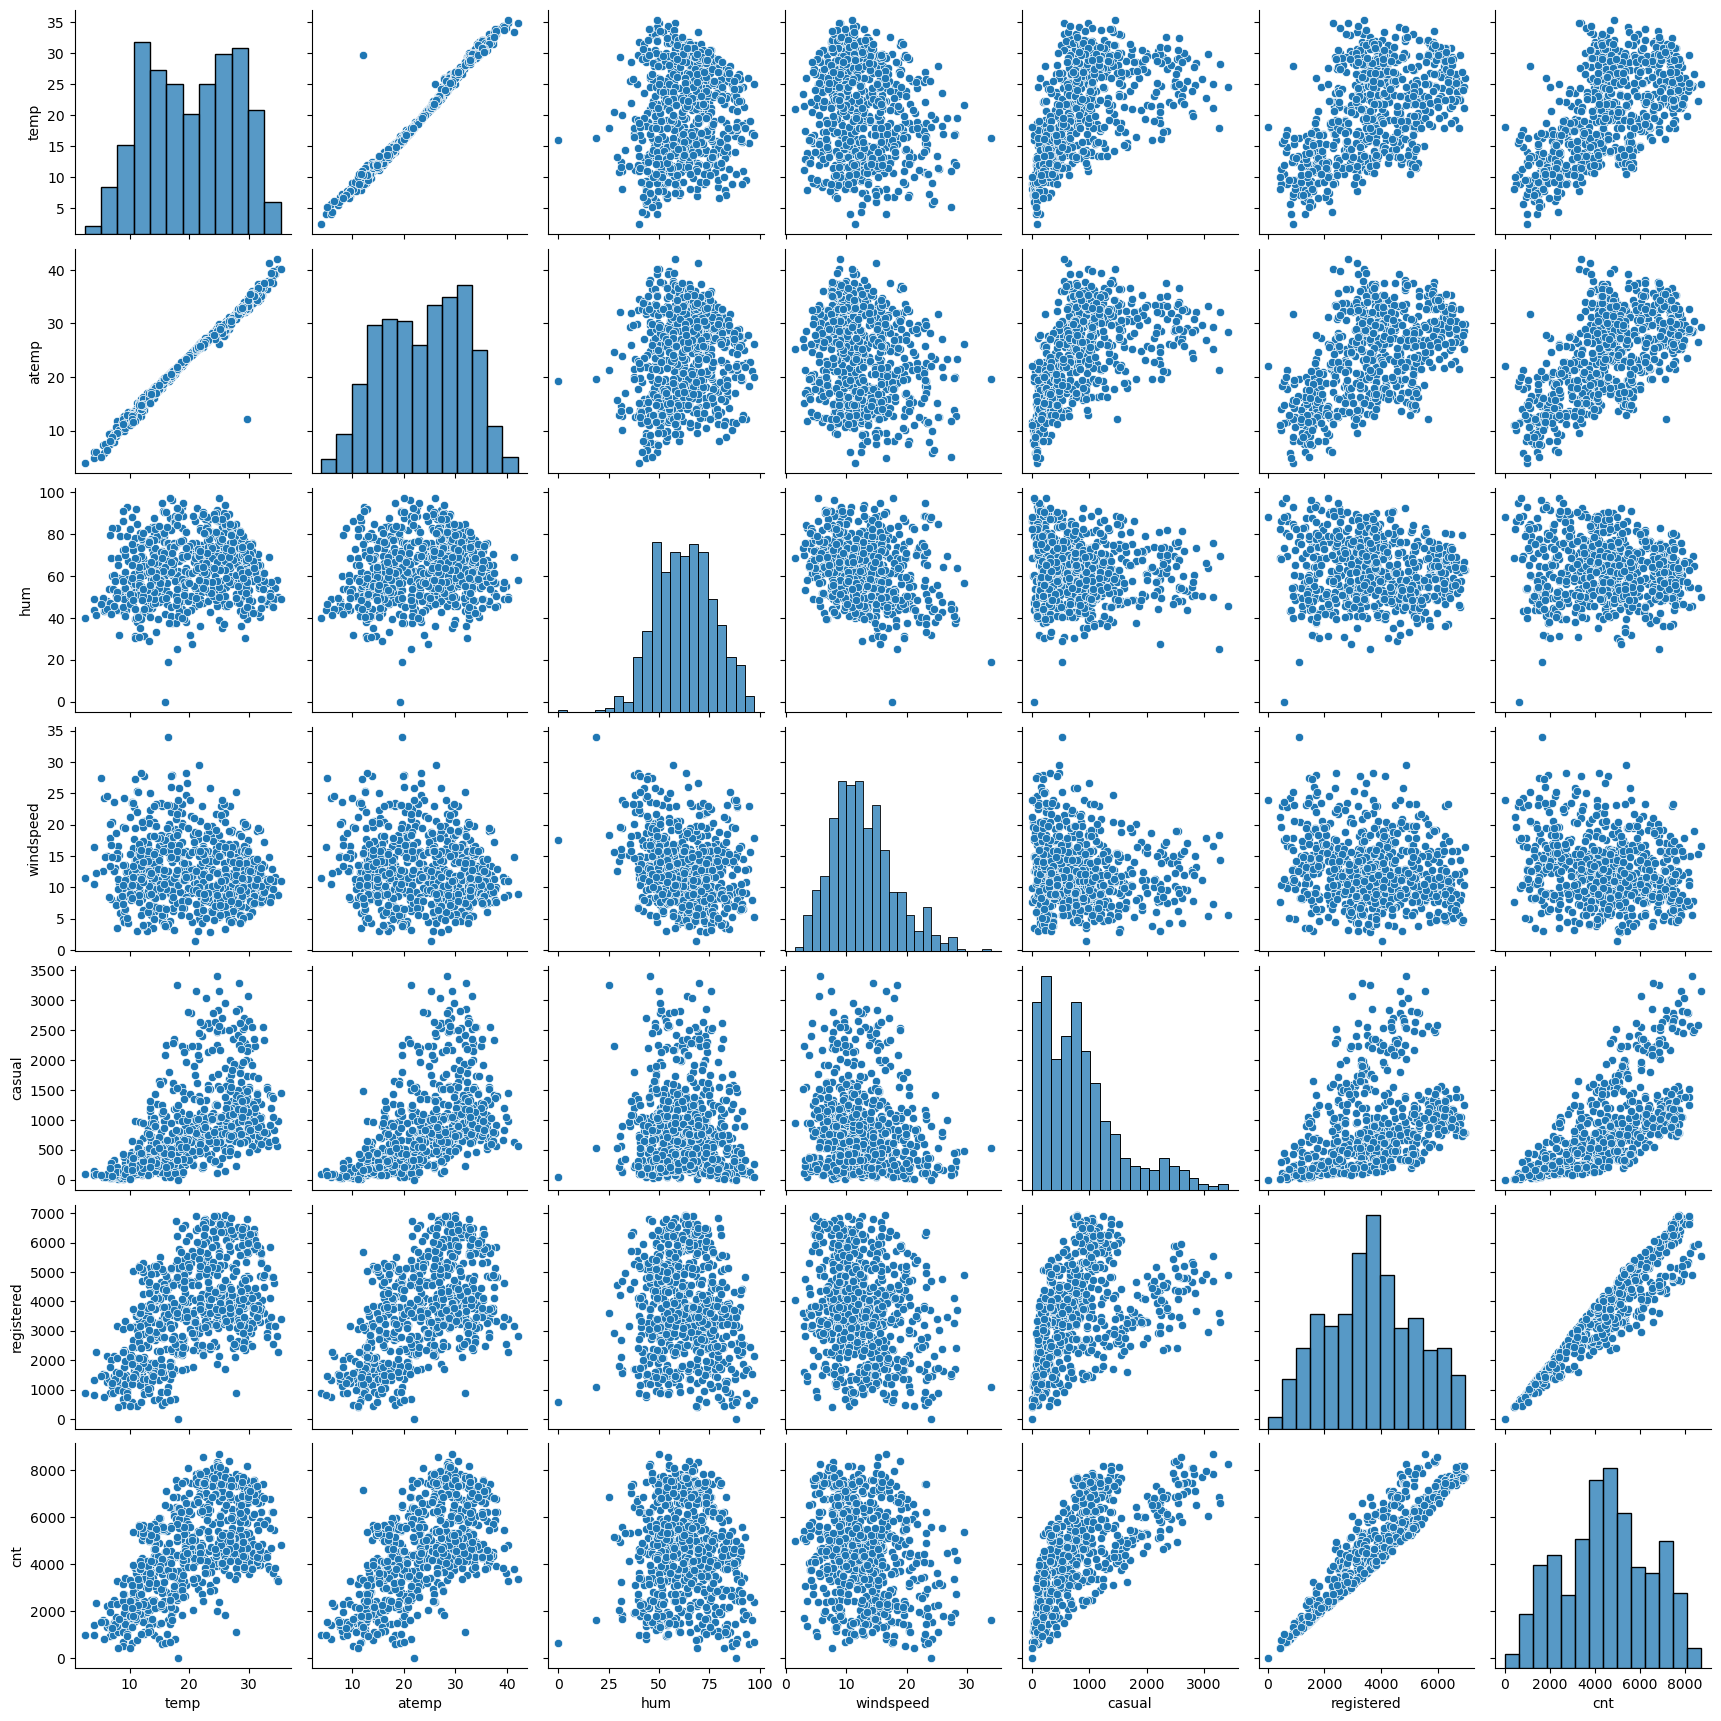

In [29]:
sns.pairplot(data[num_vars])
plt.show()

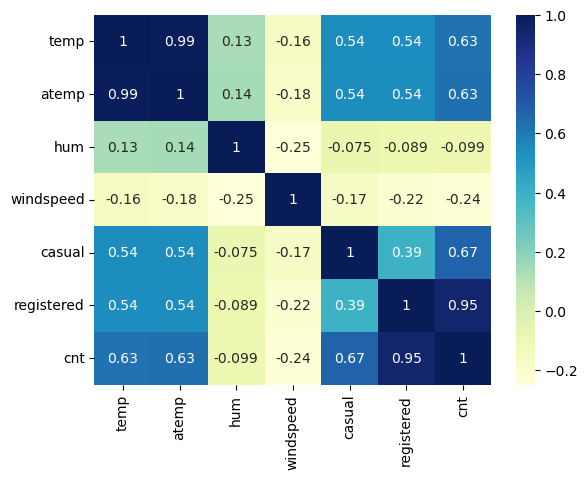

In [31]:
sns.heatmap(data[num_vars].corr(), annot=True, cmap="YlGnBu")
plt.show()

##### Observations:
As identified previously 
1. `cnt` has a strong correlation wtih `temp` and `atemp`
2. `cnt` has a weak negative correlation with `hum` and `windspeed`
3. `atemp` is highly correlated with `temp`. They both define the same parameter. Hence may be redundant
4. `registered` and `casual` define `cnt`. Hence are strongly related and redundant as `cnt` is the target varaible for this assignment

### Visualizing categorcal variables
1. weathersit
2. season
3. holiday
4. mnth
5. weekday

In [35]:
# Converting variables season, weekday, weathersit to categorical
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
weathersit_map = {1:'Clear', 2:'Mist', 3:'LightRain', 4:'HeavyRain'}
mnth_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
weekday_map = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'}

data.season = data.season.map(season_map)
data.weathersit = data.weathersit.map(weathersit_map)
data.mnth = data.mnth.map(mnth_map)
data.weekday = data.weekday.map(weekday_map)

In [37]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Derived variables for categorical variable analysis

In [40]:
# Creating a new variable to see variation riders count each month across each year
data['mnth_yr']=pd.to_datetime(data.dteday,format='%d-%m-%Y').dt.strftime('%m-%Y')

# Creating a derived column to capture the Quarter data
data['Qrtr']=pd.to_datetime(data.dteday,format='%d-%m-%Y').dt.to_period('Q')

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_yr,Qrtr
0,1,2018-01-01,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01-2018,2018Q1
1,2,2018-01-02,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,01-2018,2018Q1
2,3,2018-01-03,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,01-2018,2018Q1
3,4,2018-01-04,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,01-2018,2018Q1
4,5,2018-01-05,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,01-2018,2018Q1


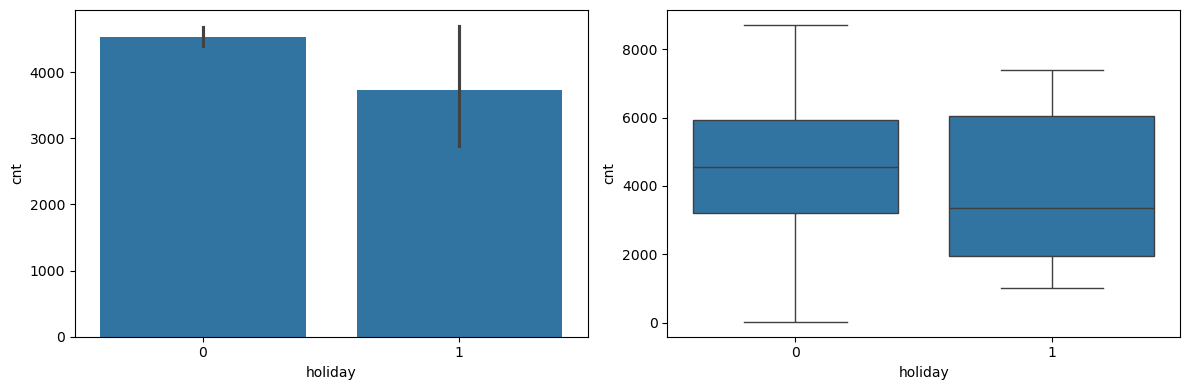

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(y=data.cnt, x=data.holiday)

plt.subplot(1,2,2)
sns.boxplot(y=data.cnt, x=data.holiday)

plt.tight_layout()
plt.show()

In [44]:
cat_vars=[ 'mnth_yr', 'season', 'mnth', 'weekday', 'weathersit']

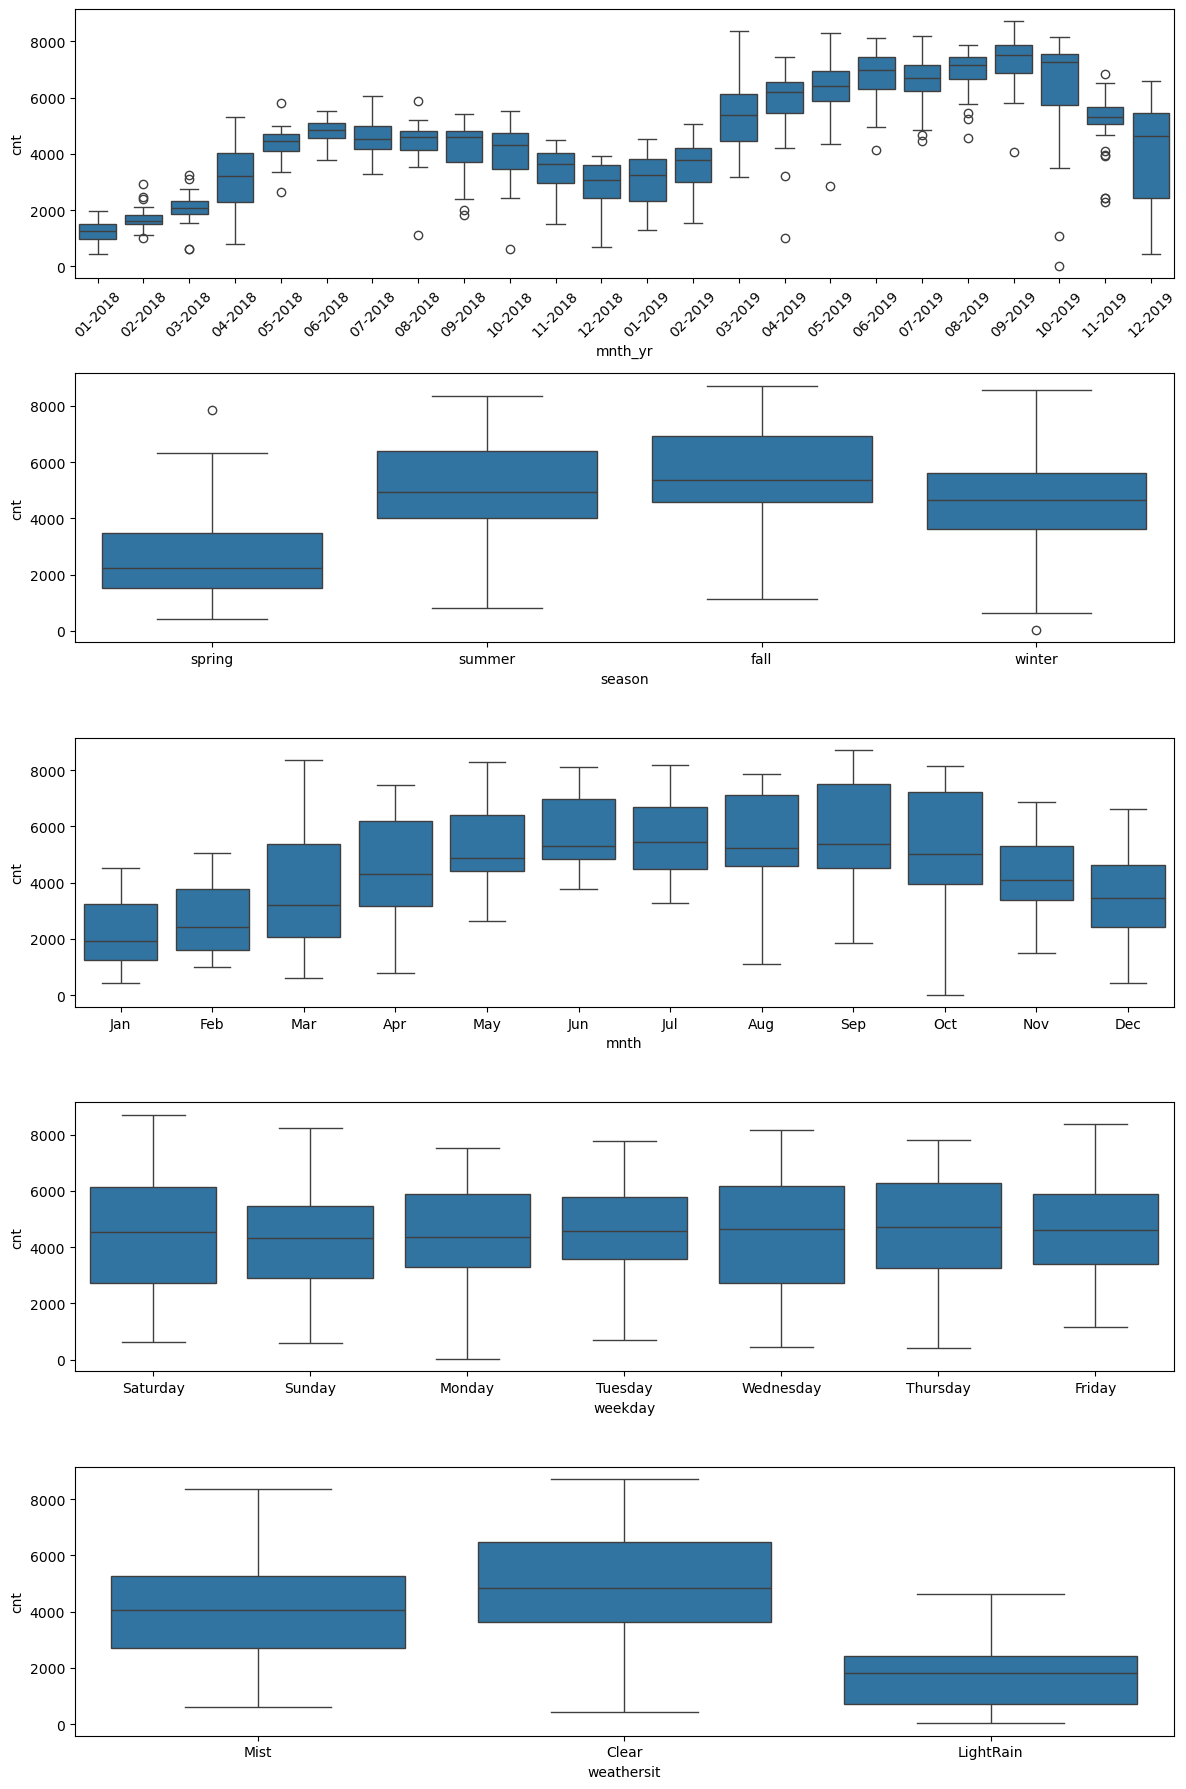

In [46]:
plt.figure(figsize=(12,18))

for var in cat_vars:
    plt.subplot(len(cat_vars),1,cat_vars.index(var)+1)
    sns.boxplot(y=data.cnt, x=data[var])
    if var == 'mnth_yr':
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Observations
- It seems that the riders count varies by `seasons`, `weathersit` and  `mnth`.
 - Count is high during summer and fall when the tempratures are relatively warm and then falls during winter and spring
 - Count also is high on clear days
- Checking the same Quarter by Quarter

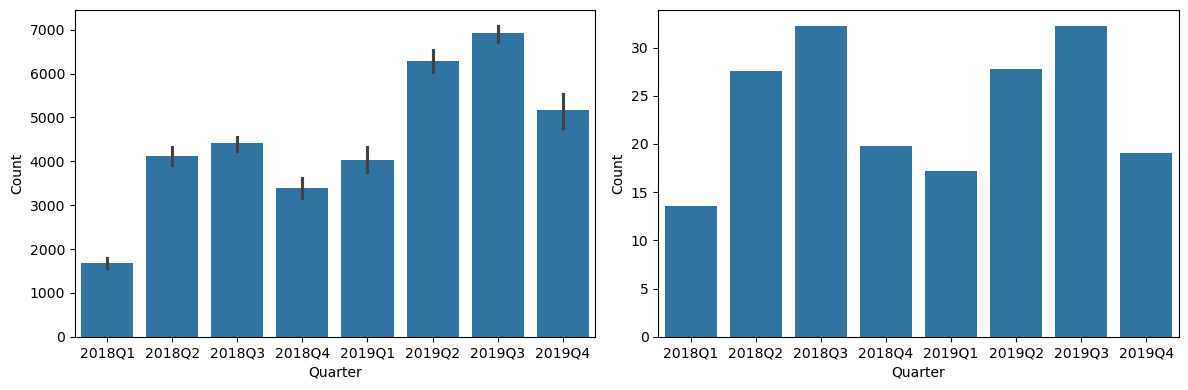

In [49]:
# Checking the possiblitiy of impact of temperature on riders count different quarters
plt.figure(figsize=(12,4))
plt.subplot (1,2,1)
sns.barplot(data=data, x='Qrtr', y=data.cnt)
plt.xlabel('Quarter')
plt.ylabel('Count')

plt.subplot (1,2,2)
sns.barplot(data=data.atemp.groupby(data.Qrtr).mean())
plt.xlabel('Quarter')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### Observation
- Riders count goes up in Q2 and Q3 and remains lower in Q1 and Q3
- This riders count is in sync with the temperature pattern
- This ties well with the seasons data indicating the impact of temperature and weather on the riders' begaviour

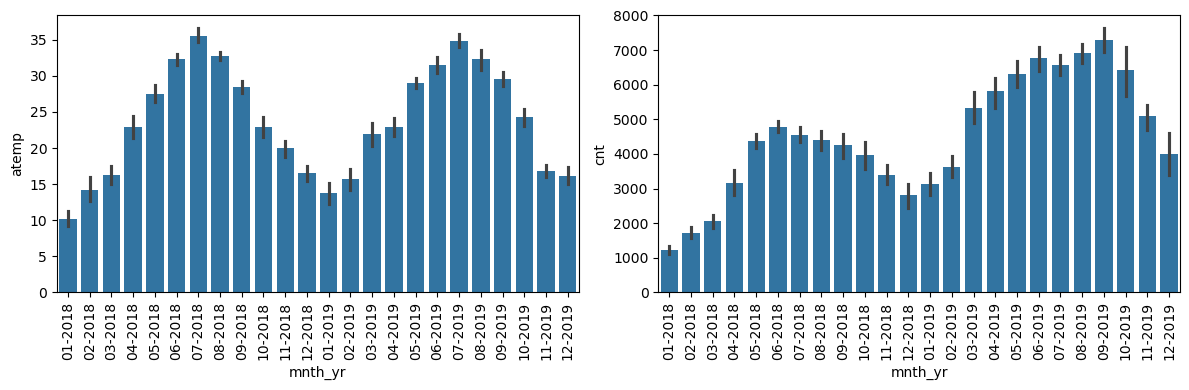

In [52]:
# Verifying if this pattern follows on a further breakdown for temperature and riders count accross months in an year
plt.figure(figsize=(12,4))
plt.subplot (1,2,1)
sns.barplot(x=data.mnth_yr, y=data.atemp)
plt.xticks(rotation=90)

plt.subplot (1,2,2)
sns.barplot(x=data.mnth_yr, y=data.cnt)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Observation
- The riders count trend closely matches the mean tempeatures pattern found across the months
  - Signifies that the riders count is dependent on the temperature

#### Checking the rider count patterns for the seasons

In [56]:
data['season_yr'] = data.season+'_'+pd.to_datetime(data.dteday,format='%d-%m-%Y').dt.strftime('%y')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_yr,Qrtr,season_yr
0,1,2018-01-01,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01-2018,2018Q1,spring_18
1,2,2018-01-02,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,01-2018,2018Q1,spring_18
2,3,2018-01-03,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,01-2018,2018Q1,spring_18
3,4,2018-01-04,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,01-2018,2018Q1,spring_18
4,5,2018-01-05,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,01-2018,2018Q1,spring_18


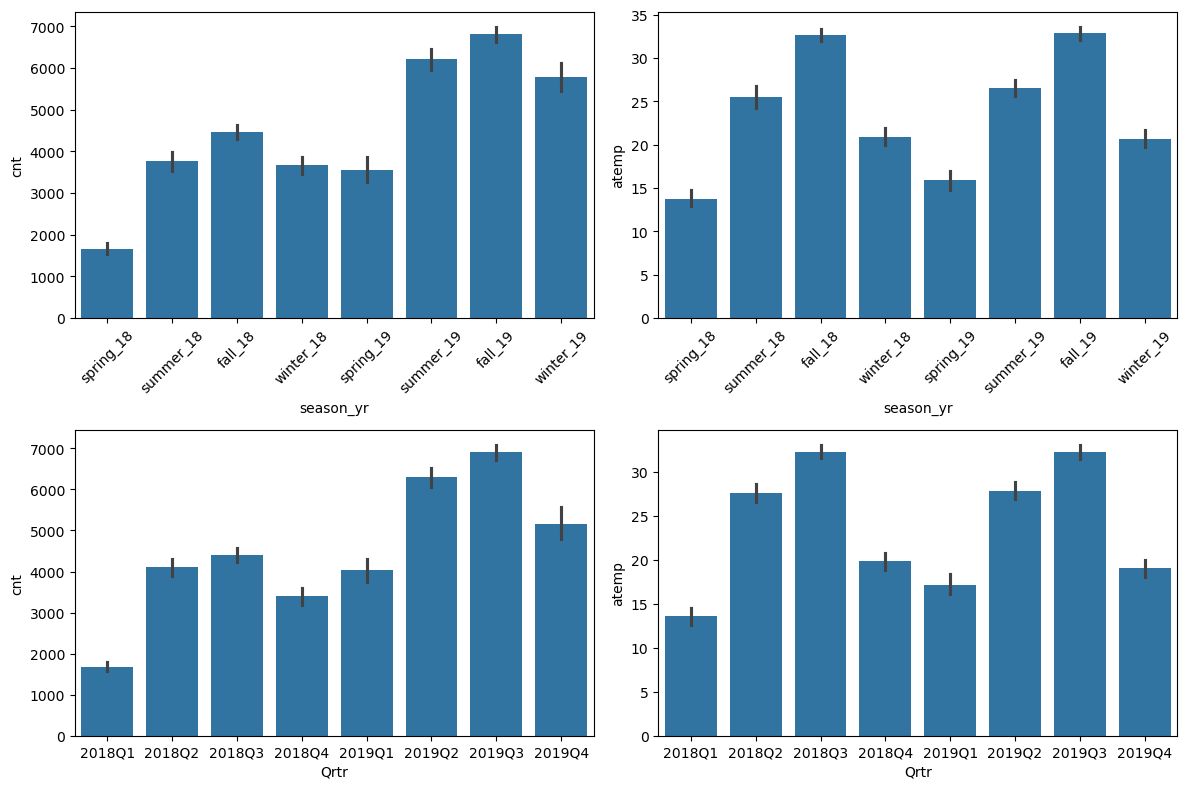

In [58]:
#Plotting to check the patterns between the quarters and seasons match

plt.figure(figsize=(12,8))

plt.subplot (2,2,1)
sns.barplot(x=data.season_yr, y=data.cnt)
plt.xticks(rotation=45)

plt.subplot (2,2,2)
sns.barplot(x=data.season_yr, y=data.atemp)
plt.xticks(rotation=45)

plt.subplot (2,2,3)
sns.barplot(data=data, x='Qrtr', y=data.cnt)

plt.subplot (2,2,4)
sns.barplot(data=data, x='Qrtr', y=data.atemp)

plt.tight_layout()
plt.show()

##### Observations
data across seasons matches with quarter, which is understandble and hence only seasons can be used as predictors

In [60]:
weekend_map = {'Sunday': 1, 'Saturday': 1, 'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0}
data['weekend'] = data.weekday.map(weekend_map)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_yr,Qrtr,season_yr,weekend
0,1,2018-01-01,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01-2018,2018Q1,spring_18,1
1,2,2018-01-02,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,01-2018,2018Q1,spring_18,1
2,3,2018-01-03,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,01-2018,2018Q1,spring_18,0
3,4,2018-01-04,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,01-2018,2018Q1,spring_18,0
4,5,2018-01-05,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,01-2018,2018Q1,spring_18,0


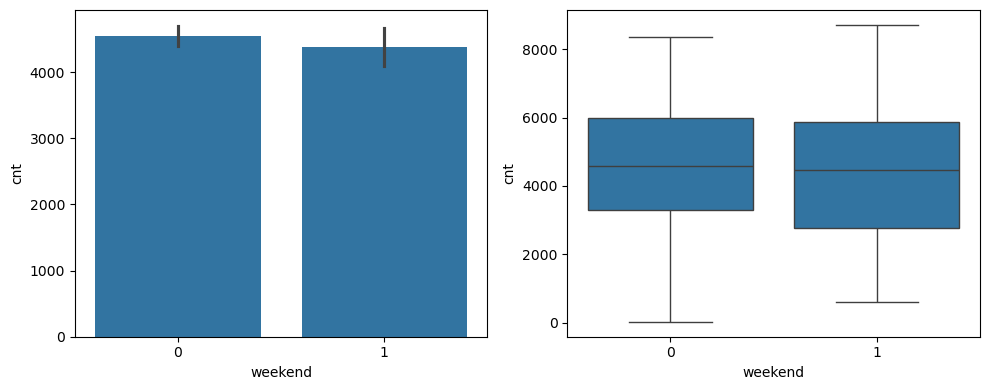

In [63]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(y=data.cnt, x=data.weekend)
plt.subplot(1,2,2)
sns.boxplot(y=data.cnt, x=data.weekend)
plt.tight_layout()
plt.show()

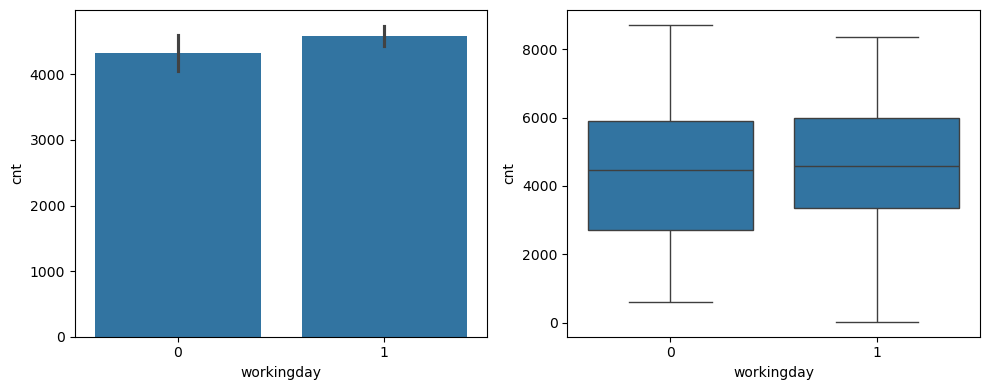

In [65]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(y=data.cnt, x=data.workingday)
plt.subplot(1,2,2)
sns.boxplot(y=data.cnt, x=data.workingday)
plt.tight_layout()
plt.show()

##### Observations:
- Count is marginally higher on workingday as compared to holidays
- count is marginally high on weekends

In [68]:
# Checking the possibile redundancy of variable holiday
data [data.holiday==1].head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_yr,Qrtr,season_yr,weekend
16,17,2018-01-17,spring,0,Jan,1,Monday,0,Mist,7.209153,8.83855,53.7500,12.999139,117,883,1000,01-2018,2018Q1,spring_18,0
51,52,2018-02-21,spring,0,Feb,1,Monday,0,Mist,12.436653,14.20375,60.5000,20.625682,195,912,1107,02-2018,2018Q1,spring_18,0
104,105,2018-04-15,summer,0,Apr,1,Friday,0,Clear,18.313347,22.09565,67.1250,15.167125,642,2484,3126,04-2018,2018Q2,summer_18,0
149,150,2018-05-30,summer,0,May,1,Monday,0,Clear,30.066653,33.55460,68.5000,8.792075,1549,2549,4098,05-2018,2018Q2,summer_18,0
184,185,2018-07-04,fall,0,Jul,1,Monday,0,Mist,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,07-2018,2018Q3,fall_18,0
247,248,2018-09-05,fall,0,Sep,1,Monday,0,Mist,27.606653,31.28230,79.0417,14.250632,1236,2115,3351,09-2018,2018Q3,fall_18,0
282,283,2018-10-10,winter,0,Oct,1,Monday,0,Clear,23.404153,27.14625,73.3750,2.834381,1514,3603,5117,10-2018,2018Q4,winter_18,0
314,315,2018-11-11,winter,0,Nov,1,Friday,0,Clear,13.290847,15.34085,44.6250,21.083225,440,2928,3368,11-2018,2018Q4,winter_18,0
327,328,2018-11-24,winter,0,Nov,1,Thursday,0,Clear,15.306653,18.62355,54.9167,11.209368,560,935,1495,11-2018,2018Q4,winter_18,0
359,360,2018-12-26,spring,0,Dec,1,Monday,0,Clear,13.191299,15.77675,50.6957,16.044155,430,887,1317,12-2018,2018Q4,spring_18,0


##### Observation:
- As observed, holidays are non-working weekdays. 
- Hence this seems to be redundant as the same information is captured by `workingday`

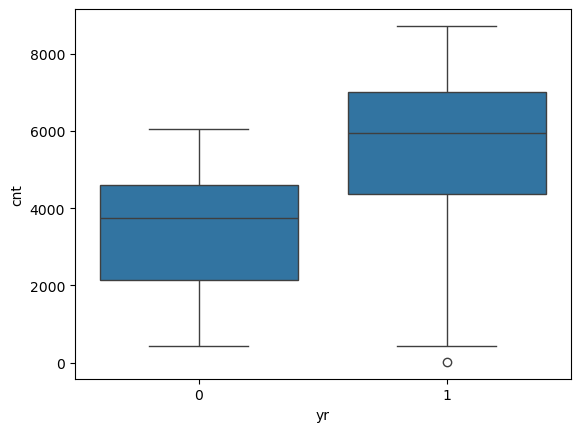

In [71]:
sns.boxplot(y=data.cnt, x=data.yr)
plt.show()

##### Observation
- Count significantly increased year on year

#### Final Observations of data
- `cnt` is the target variable
  - Count of riders increased from 2018 to 2019
- `cnt` shows an upward trend during Summer and Fall. Sees dip during winters and spring.
- `season` closely describes the `cnt` data also shown by  `Qrtr_yr`/`Qrtr` and broadly explains `mnth` data.
 - Hence can be the only variable to use to define time of th year
- `instant` can be dropped as it has no significance to the rider's count
- `temp` and `atemp` are highly correlated and hence one of them can be dropped.
  - Here, considering to drop `temp`  as `atemp` is what the rider actually feels
- `cnt` is totally described by `casual` and `registered` as **cnt = casual + registered**. Hence can drop these redundant variables
- `cnt` varies with `weathersit` and only marginal/negligible with `weekend` and `workingday`
- `holiday` is already explained by `workingday` and hence may be dropped
- `weekend` is derived from `weekday` and can be explained by it. Hence can be dropped
- `hum` has a very weak negative correlation with `cnt` and can be dropped

## Step 3: Data Modelling
- Data cleaning
- Data encoding
  - Converting categorical variables to dummy variables
- Data split for training and testing
- Scaling data

### Data Cleaning - Dropping redundant columns

In [77]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'mnth_yr', 'Qrtr', 'season_yr',
       'weekend'],
      dtype='object')

##### Dropping unwanted columns as mentioned in the above analysis

In [80]:
data = data.drop(columns = ['instant', 'dteday', 'temp', 'casual', 'registered','mnth_yr', 'Qrtr', 'season_yr', 'weekend', 'holiday', 'hum'])
data.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,windspeed,cnt
0,spring,0,Jan,Saturday,0,Mist,18.18125,10.749882,985
1,spring,0,Jan,Sunday,0,Mist,17.68695,16.652113,801
2,spring,0,Jan,Monday,1,Clear,9.47025,16.636703,1349
3,spring,0,Jan,Tuesday,1,Clear,10.60610,10.739832,1562
4,spring,0,Jan,Wednesday,1,Clear,11.46350,12.522300,1600


#### Creating dummies for the categorical variables

In [85]:
weathersit_dum = pd.get_dummies(data.weathersit, drop_first=True, dtype = int)
season_dum = pd.get_dummies(data.season, drop_first=True, dtype = int)
mnth_dum = pd.get_dummies(data.mnth, drop_first=True, dtype = int)
weekday_dum = pd.get_dummies(data.weekday, drop_first=True, dtype = int)

In [87]:
print (weathersit_dum.head())
print (season_dum.head())
print (mnth_dum.head())
print (weekday_dum.head())

   LightRain  Mist
0          0     1
1          0     1
2          0     0
3          0     0
4          0     0
   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0
   Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0         1       0         0        0          0
1       0         0       1         0        0          0
2       1         0       0         0        0          0
3       0         0       0         0        1          0
4       0         0       0         0        0          1


In [89]:
# Merging the dummies to the data and dropping the variables mnth, season and weathersit

data = pd.concat([data,weathersit_dum, season_dum, mnth_dum, weekday_dum], axis=1)
data = data.drop(columns=['weathersit', 'season',  'mnth', 'weekday'])

data.head()

,yr,workingday,atemp,windspeed,cnt,LightRain,Mist,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,18.18125,10.749882,985,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,17.68695,16.652113,801,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,9.47025,16.636703,1349,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,10.60610,10.739832,1562,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,11.46350,12.522300,1600,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Data seems ready with all numeric and binary variables

### Splitting data

#### Importing sklearn and statsmodels libraries

In [91]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [93]:
data_train, data_test = train_test_split(data, train_size=0.7, random_state=100)
print (data_train.shape)
print (data_test.shape)

(510, 27)
(220, 27)


### Rescaling data
Using Min Max scaler as there are many variables with binary values and others with high integer values

In [96]:
# 1. Instantiate an object
min_max_scaler = MinMaxScaler()

In [98]:
# 2. Define the list of variables that needs to be scaled. Leaving out binary and dummy variables
num_vars = ['cnt', 'atemp', 'windspeed']

In [100]:
# 3. Apply Scaler to the variable. Fit the variables and then transform

# Note Data is transformed only on the training data but not on the test data
# Test data is only fit to the model but not transformed

data_train[num_vars] = min_max_scaler.fit_transform(data_train[num_vars])
data_train.head()

,yr,workingday,atemp,windspeed,cnt,LightRain,Mist,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,1,0.766351,0.264686,0.827658,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0.438975,0.255342,0.465255,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.200348,0.663106,0.204096,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0.391735,0.188475,0.482973,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
111,0,1,0.318819,0.380981,0.191095,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
data_train.describe()

,yr,workingday,atemp,windspeed,cnt,LightRain,Mist,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.513156,0.320883,0.513499,0.029412,0.345098,0.243137,0.247059,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.468282,0.212410,0.169803,0.224421,0.169124,0.475867,0.429398,0.431725,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.332086,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.529718,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.688457,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the data is now scaled down

## Step 4 - Training the model

### Defining X and Y

In [107]:
y_data_train = data_train.pop('cnt')
X_data_train = data_train

print(y_data_train.head())
print(X_data_train.head())

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64
     yr  workingday     atemp  windspeed  LightRain  Mist  spring  summer  \
576   1           1  0.766351   0.264686          0     0       0       0   
426   1           0  0.438975   0.255342          0     1       1       0   
728   1           0  0.200348   0.663106          0     0       1       0   
482   1           0  0.391735   0.188475          0     1       0       1   
111   0           1  0.318819   0.380981          0     1       0       1   

     winter  Aug  ...  May  Nov  Oct  Sep  Monday  Saturday  Sunday  Thursday  \
576       0    0  ...    0    0    0    0       0         0       0         0   
426       0    0  ...    0    0    0    0       0         1       0         0   
728       0    0  ...    0    0    0    0       0         0       1         0   
482       0    0  ...    0    0    0    0       0         1       0         0   
111       0    0  ...    0

### Building model
Using **Recursive Feature Elimination** from SciKit learn

#### Checking the model stats with all the features

In [111]:
#Verifying the R2 score with all the predictor variables 
lm_full = sm.OLS(y_data_train, X_data_train).fit()

# Printing the summary
print (lm_full.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              706.0
Date:                Mon, 23 Dec 2024   Prob (F-statistic):                        0.00
Time:                        19:45:16   Log-Likelihood:                          505.48
No. Observations:                 510   AIC:                                     -959.0
Df Residuals:                     484   BIC:                                     -848.9
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [113]:
# Verifying the VIF for the features/varaibles selected in the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_data_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_data_train.values, i) for i in range(X_data_train.shape[1])]

print(vif_data)

       Feature        VIF
0           yr   2.106513
1   workingday  21.490283
2        atemp  27.445102
3    windspeed   4.984486
4    LightRain   1.122560
5         Mist   1.636577
6       spring  12.057293
7       summer   7.295038
8       winter  11.959320
9          Aug   5.651242
10         Dec   4.629341
11         Feb   3.906997
12         Jan   5.046557
13         Jul   5.144559
14         Jun   2.778028
15         Mar   3.416568
16         May   2.331408
17         Nov   5.716871
18         Oct   6.009514
19         Sep   4.055085
20      Monday   2.153702
21    Saturday   6.366583
22      Sunday   5.829558
23    Thursday   2.055982
24     Tuesday   2.027240
25   Wednesday   2.264004


In [115]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

sk_lm = LinearRegression()
sk_lm.fit(X_data_train, y_data_train)

LinearRegression()

In [117]:
#Running RFE
rfe = RFE(estimator=sk_lm,n_features_to_select=15)
rfe = rfe.fit(X_data_train, y_data_train)

sorted_list = sorted(list(zip(X_data_train.columns, rfe.support_, rfe.ranking_)), key=lambda x: x[2])
sorted_list

[('yr', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('windspeed', True, 1),
 ('LightRain', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('winter', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Nov', True, 1),
 ('Sep', True, 1),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('May', False, 2),
 ('Jun', False, 3),
 ('Aug', False, 4),
 ('summer', False, 5),
 ('Monday', False, 6),
 ('Tuesday', False, 7),
 ('Thursday', False, 8),
 ('Wednesday', False, 9),
 ('Jul', False, 10),
 ('Oct', False, 11),
 ('Mar', False, 12)]

In [119]:
# Selecting the predictor columns as per the RFE
pred_cols = X_data_train.columns[rfe.support_]
drop_cols = X_data_train.columns[~rfe.support_]

print ((pred_cols).to_list())
print (len(pred_cols))
print ((drop_cols).to_list())

['yr', 'workingday', 'atemp', 'windspeed', 'LightRain', 'Mist', 'spring', 'winter', 'Dec', 'Feb', 'Jan', 'Nov', 'Sep', 'Saturday', 'Sunday']
15
['summer', 'Aug', 'Jul', 'Jun', 'Mar', 'May', 'Oct', 'Monday', 'Thursday', 'Tuesday', 'Wednesday']


In [121]:
# Creating trainig data with predictors suggested by RFE
X_data_train_rfe = X_data_train[pred_cols]

In [123]:
X_data_train_rfe = sm.add_constant(X_data_train_rfe)
X_data_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   atemp       510 non-null    float64
 4   windspeed   510 non-null    float64
 5   LightRain   510 non-null    int32  
 6   Mist        510 non-null    int32  
 7   spring      510 non-null    int32  
 8   winter      510 non-null    int32  
 9   Dec         510 non-null    int32  
 10  Feb         510 non-null    int32  
 11  Jan         510 non-null    int32  
 12  Nov         510 non-null    int32  
 13  Sep         510 non-null    int32  
 14  Saturday    510 non-null    int32  
 15  Sunday      510 non-null    int32  
dtypes: float64(3), int32(11), int64(2)
memory usage: 45.8 KB


In [125]:
#Verifying the R2 score with the predictor variables from RFE

lm_full = sm.OLS(y_data_train, X_data_train_rfe).fit()

# Printing the summary
print (lm_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          3.85e-185
Time:                        19:45:37   Log-Likelihood:                 505.41
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     494   BIC:                            -911.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2374      0.037      6.498      0.0

In [127]:
# Create a DataFrame for VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_data_train_rfe.columns
vif_data['VIF'] = [variance_inflation_factor(X_data_train_rfe.values, i) for i in range(X_data_train_rfe.shape[1])]

print(vif_data)

       Feature        VIF
0        const  81.765391
1           yr   1.019549
2   workingday   9.226252
3        atemp   2.914451
4    windspeed   1.139535
5    LightRain   1.063705
6         Mist   1.045770
7       spring   3.408618
8       winter   2.256258
9          Dec   1.557202
10         Feb   1.821107
11         Jan   2.243169
12         Nov   1.740870
13         Sep   1.082273
14    Saturday   6.169996
15      Sunday   5.823362


In [129]:
X_data_train_new = X_data_train_rfe.drop(columns=['Saturday','Sunday'])

In [131]:
lm_rfe = sm.OLS(y_data_train, X_data_train_new).fit()

# Printing the summary
print (lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.1
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          1.32e-182
Time:                        19:45:45   Log-Likelihood:                 493.91
No. Observations:                 510   AIC:                            -959.8
Df Residuals:                     496   BIC:                            -900.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3044      0.027     11.358      0.0

In [133]:
# Create a DataFrame for VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_data_train_new.columns
vif_data['VIF'] = [variance_inflation_factor(X_data_train_new.values, i) for i in range(X_data_train_new.shape[1])]

print(vif_data)

       Feature        VIF
0        const  42.204135
1           yr   1.019242
2   workingday   1.013738
3        atemp   2.913619
4    windspeed   1.138352
5    LightRain   1.060832
6         Mist   1.042679
7       spring   3.407670
8       winter   2.254794
9          Dec   1.554672
10         Feb   1.813183
11         Jan   2.239466
12         Nov   1.713881
13         Sep   1.074847


In [135]:
X_data_train_new = X_data_train_new.drop(columns=['Jan', 'Feb', 'Dec', 'Sep', 'Nov'])

In [137]:
#Verifying the R2 score with the predictor variables from RFE iteration 3
lm_rfe = sm.OLS(y_data_train, X_data_train_new).fit()

# Printing the summary
print (lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.4
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          5.92e-179
Time:                        19:45:52   Log-Likelihood:                 471.11
No. Observations:                 510   AIC:                            -924.2
Df Residuals:                     501   BIC:                            -886.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2523      0.026      9.812      0.0

In [141]:
# Create a DataFrame for VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_data_train_new.columns
vif_data['VIF'] = [variance_inflation_factor(X_data_train_new.values, i) for i in range(X_data_train_new.shape[1])]

print(vif_data)

      Feature        VIF
0       const  35.889545
1          yr   1.017598
2  workingday   1.013693
3       atemp   2.414515
4   windspeed   1.084993
5   LightRain   1.047355
6        Mist   1.033754
7      spring   2.454886
8      winter   1.644514


#### Observations:
- VIF scores are below 5 and are relevant and affect the count
- p values of all these variables are <0.05 there by statistically significant
- Hence going to proceed with this model for residual analysis and verification

In [143]:
sk_lm.fit(X_data_train_new, y_data_train)

LinearRegression()

## Step 5: Residual Analysis

In [147]:
y_data_train_pred = sk_lm.predict(X_data_train_new)

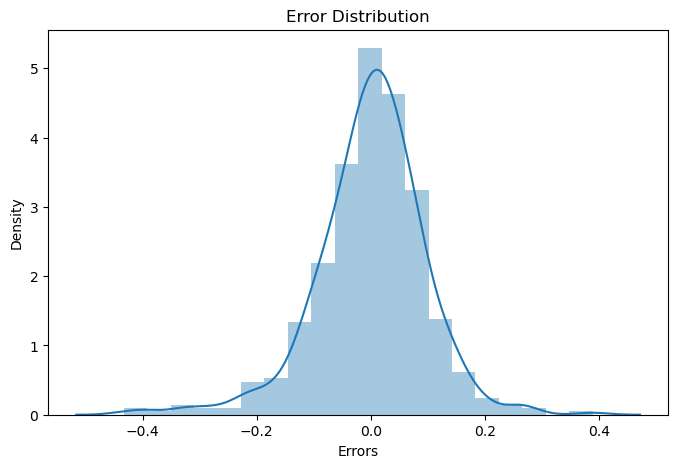

In [149]:
plt.figure(figsize=(8,5))
sns.distplot((y_data_train - y_data_train_pred), bins=20 )
plt.title('Error Distribution')
plt.xlabel('Errors')
plt.show()

As observed, residuals/errors are **normally distributed**.

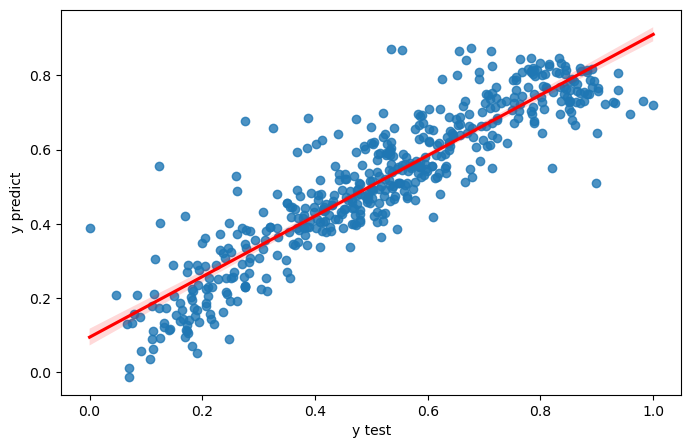

In [198]:
# Plotting y_data_train and y_data_train_predict

plt.figure(figsize=(8,5))
sns.regplot(x=y_data_train, y=y_data_train_pred, line_kws = { 'color': 'red' })
plt.xlabel('y test')
plt.ylabel('y predict')

plt.show()

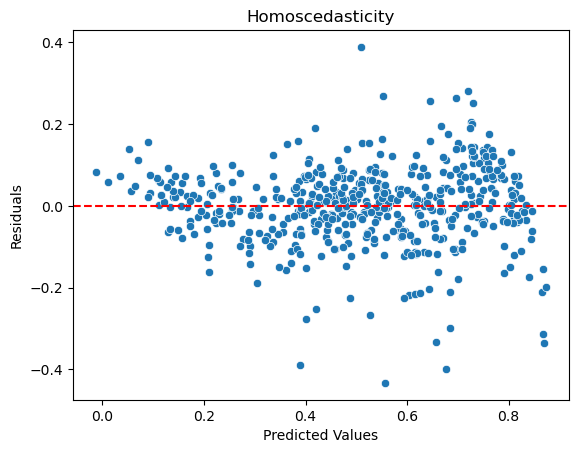

In [200]:
# Visualize Homoscedasticity
sns.scatterplot(x = y_data_train_pred, y = (y_data_train - y_data_train_pred))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

##### Observation:
The residuals have a uniform spread across all levels of the independent variable(s)

## Step 6: Evaluation of Model

In [153]:
data_test.head()

,yr,workingday,atemp,windspeed,cnt,LightRain,Mist,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,0,33.27085,5.459106,6043,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,1,36.04875,7.625404,6211,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,1,22.85230,13.250121,2659,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,1,34.24915,13.417286,4780,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,1,32.19710,19.583229,4968,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [155]:
num_vars

['cnt', 'atemp', 'windspeed']

In [157]:
data_test[num_vars] = min_max_scaler.transform(data_test[num_vars])

In [159]:
data_test.head()

,yr,workingday,atemp,windspeed,cnt,LightRain,Mist,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,0,0.769660,0.084219,0.692706,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,1,0.842587,0.153728,0.712034,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,1,0.496145,0.334206,0.303382,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,1,0.795343,0.339570,0.547400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,1,0.741471,0.537414,0.569029,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [161]:
y_data_test = data_test.pop('cnt')
X_data_test = data_test

In [164]:
print (y_data_test.head())
print (X_data_test.head())

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64
     yr  workingday     atemp  windspeed  LightRain  Mist  spring  summer  \
184   0           0  0.769660   0.084219          0     1       0       0   
535   1           1  0.842587   0.153728          0     0       0       1   
299   0           1  0.496145   0.334206          0     1       0       0   
221   0           1  0.795343   0.339570          0     0       0       0   
152   0           1  0.741471   0.537414          0     0       0       1   

     winter  Aug  ...  May  Nov  Oct  Sep  Monday  Saturday  Sunday  Thursday  \
184       0    0  ...    0    0    0    0       1         0       0         0   
535       0    0  ...    0    0    0    0       0         0       0         0   
299       1    0  ...    0    0    1    0       0         0       0         1   
221       0    1  ...    0    0    0    0       0         0       0         0   
152       0    0  ...    0

### Using the predictors from the model tested above

In [167]:
# Verifying the predictors in test data X
X_data_test.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'LightRain', 'Mist', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [169]:
# Fetch the predictors from training data
X_data_train_new.columns

Index(['const', 'yr', 'workingday', 'atemp', 'windspeed', 'LightRain', 'Mist',
       'spring', 'winter'],
      dtype='object')

In [171]:
# Filtering the unwanted predictors from testing data
# Excluding the const

X_data_test = X_data_test[list(X_data_train_new.columns)[1:]]

In [173]:
X_data_test.head()

,yr,workingday,atemp,windspeed,LightRain,Mist,spring,winter
184,0,0,0.769660,0.084219,0,1,0,0
535,1,1,0.842587,0.153728,0,0,0,0
299,0,1,0.496145,0.334206,0,1,0,1
221,0,1,0.795343,0.339570,0,0,0,0
152,0,1,0.741471,0.537414,0,0,0,0


In [175]:
X_data_test.describe()

,yr,workingday,atemp,windspeed,LightRain,Mist,spring,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.700000,0.532847,0.313293,0.027273,0.318182,0.254545,0.236364
std,0.500809,0.459303,0.217401,0.159584,0.163248,0.466833,0.436599,0.425817
min,0.000000,0.000000,0.025950,-0.042808,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.344870,0.198843,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.544652,0.300126,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.713308,0.402718,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.980934,0.807474,1.000000,1.000000,1.000000,1.000000


In [177]:
X_data_test_final = sm.add_constant(X_data_test)
X_data_test_final.head()

,const,yr,workingday,atemp,windspeed,LightRain,Mist,spring,winter
184,1.0,0,0,0.769660,0.084219,0,1,0,0
535,1.0,1,1,0.842587,0.153728,0,0,0,0
299,1.0,0,1,0.496145,0.334206,0,1,0,1
221,1.0,0,1,0.795343,0.339570,0,0,0,0
152,1.0,0,1,0.741471,0.537414,0,0,0,0


In [179]:
# Making predictions

y_data_test_pred = sk_lm.predict(X_data_test_final)

In [181]:
y_data_test_pred[:5]

array([0.50120496, 0.85801936, 0.40987849, 0.57771187, 0.5284983 ])

### Evaluation using test data

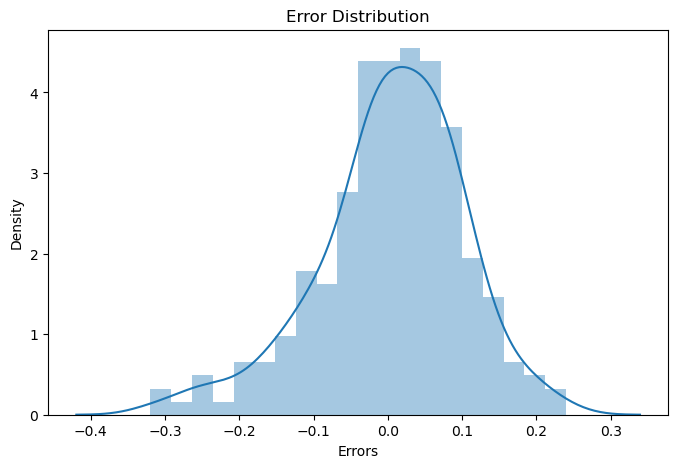

In [184]:
plt.figure(figsize=(8,5))
sns.distplot((y_data_test - y_data_test_pred), bins=20, kde=True )
plt.title('Error Distribution')
plt.xlabel('Errors')
plt.show()

##### Observation:
The residuals are normally distributed around mean value 0

In [188]:
r2_score(y_data_test, y_data_test_pred)

0.8006230524698472

In [190]:
print (lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.4
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          5.92e-179
Time:                        19:48:06   Log-Likelihood:                 471.11
No. Observations:                 510   AIC:                            -924.2
Df Residuals:                     501   BIC:                            -886.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2523      0.026      9.812      0.0

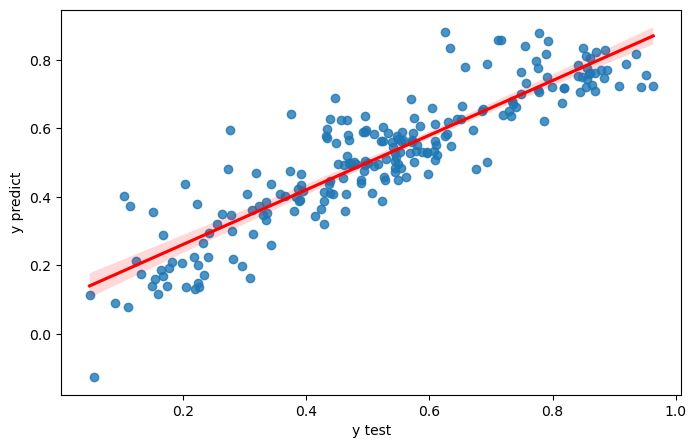

In [196]:
# Plotting y_data_test and y_data_predict

plt.figure(figsize=(8,5))
sns.regplot(x=y_data_test, y=y_data_test_pred, line_kws = { 'color': 'red' })
plt.xlabel('y test')
plt.ylabel('y predict')

plt.show()

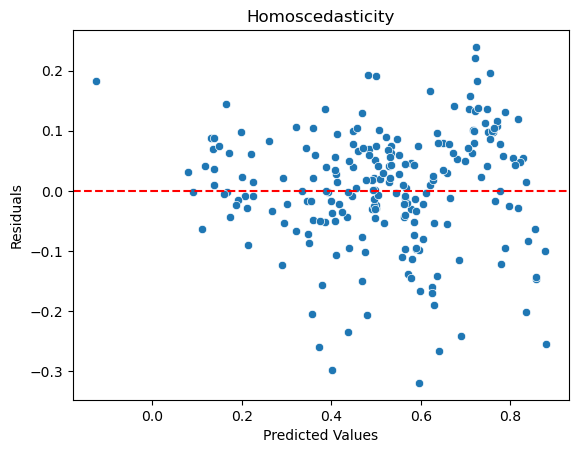

In [204]:
# Visualize Homoscedasticity
sns.scatterplot(x = y_data_test_pred, y = (y_data_test - y_data_test_pred))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

##### Observation:
The residuals have a uniform spread across all levels of the independent variable(s)

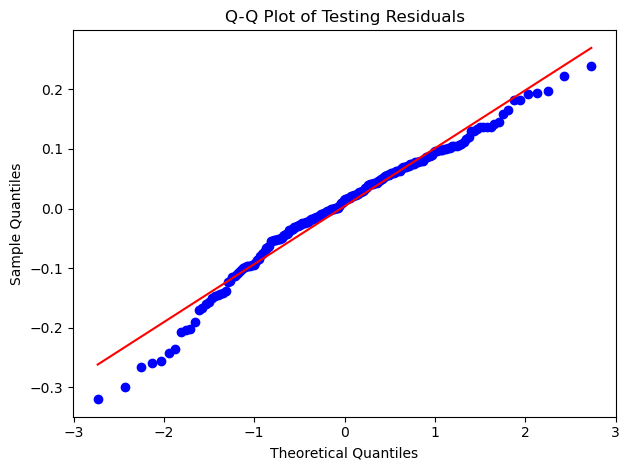

In [211]:
import scipy.stats as stats

# Calculate residuals
test_residuals = y_data_test - y_data_test_pred

# Subplot for testing residuals Q-Q plot
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Testing Residuals')

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Show the plot
plt.tight_layout()
plt.show()

##### Observation
- Points close to the diagonal line indicate normality.

## Conclusion:
- The above evaluation show that model is good with a R-sq delta  of 1.5% between train (0.81) and test results (0.81)
- The residuals show Homoscedasticity - their variance is constant across all levels of the independent variable(s)
- Q-Q plot aligns closely with the diagonal line, indicating normal distribution
- Hence, the equation of the best fitted line is:
   - $ridercount = 0.252 + 0.235 \times yr + 0.023 \times workingday + 0.435 \times atemp - 0.13 \times windspeed - 0.276 \times LightRain - 0.075 \times Mist - 0.1271 \times spring + 0.036 \times winter $
- This explains that $81 \%$ of the variance in the ridercount is explained by the above perdictor variables